<a href="https://colab.research.google.com/github/Uthmankobo/MyNewPortfolio-UniGrp/blob/main/Week_3_Assign_UYK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = "quotes_dataset.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows of the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        87 non-null     int64 
 1   Sentence  87 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


(None,
    ID                                           Sentence
 0   1  The world as we have created it is a process o...
 1   2  It is our choices, Harry, that show what we tr...
 2   3  There are only two ways to live your life. One...
 3   4  The person, be it gentleman or lady, who has n...
 4   5  Imperfection is beauty, madness is genius and ...)

In [3]:
# Install necessary libraries (run only once in Colab)
!pip install textblob
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
# Import libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Import libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset (if not already loaded)
file_path = "quotes_dataset.csv"
df = pd.read_csv(file_path)  # Use correct path if not in root

# Apply sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Create new columns for polarity and subjectivity
df[['Polarity', 'Subjectivity']] = df['Sentence'].apply(lambda x: pd.Series(get_sentiment(x)))

# Classify sentiment based on polarity
def classify_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(classify_sentiment)


In [7]:
from IPython.display import display

# Display nicely formatted table
display(df[['Sentence', 'Polarity', 'Subjectivity', 'Sentiment']].head(10))


,Sentence,Polarity,Subjectivity,Sentiment
0,The world as we have created it is a process o...,0.000000,0.000000,Neutral
1,"It is our choices, Harry, that show what we tr...",0.300000,0.750000,Positive
2,There are only two ways to live your life. One...,0.003788,0.625000,Positive
3,"The person, be it gentleman or lady, who has n...",-0.050000,0.800000,Negative
4,"Imperfection is beauty, madness is genius and ...",-0.277778,0.833333,Negative
5,Try not to become a man of success. Rather bec...,0.300000,0.000000,Positive
6,It is better to be hated for what you are than...,0.100000,0.666667,Positive
7,"I have not failed. Ive just found 10,000 ways ...",0.250000,0.300000,Positive
8,A woman is like a tea bag you never know how s...,0.341667,0.791667,Positive
9,"A day without sunshine is like, you know, night.",0.000000,0.000000,Neutral


<ipython-input-8-631c4db118b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


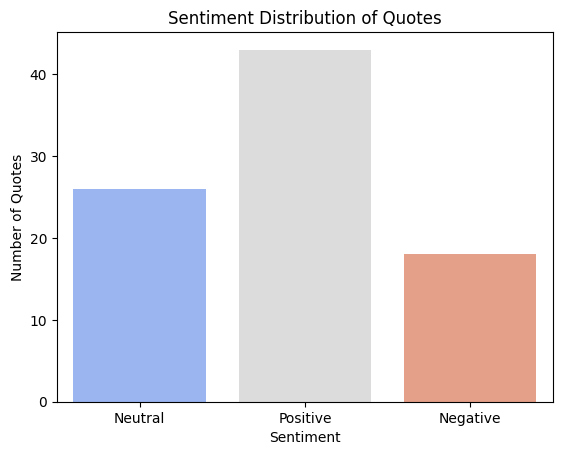

In [8]:
# Plot sentiment distribution
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution of Quotes')
plt.xlabel('Sentiment')
plt.ylabel('Number of Quotes')
plt.show()


In [9]:
# Display summary of sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print("Summary of Sentiment Distribution:")
print(sentiment_counts)

Summary of Sentiment Distribution:
Sentiment
Positive    43
Neutral     26
Negative    18
Name: count, dtype: int64
